# Self-Driving Car Engineering
## Advanced Lane Finding
A pipeline to detect lanes in a video stream using perspective transform, histogram peaks, and a polynomial curve fit.

The goals / steps of this project are the following:

* Compute a camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [17]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

### Step 1: Camera Calibration

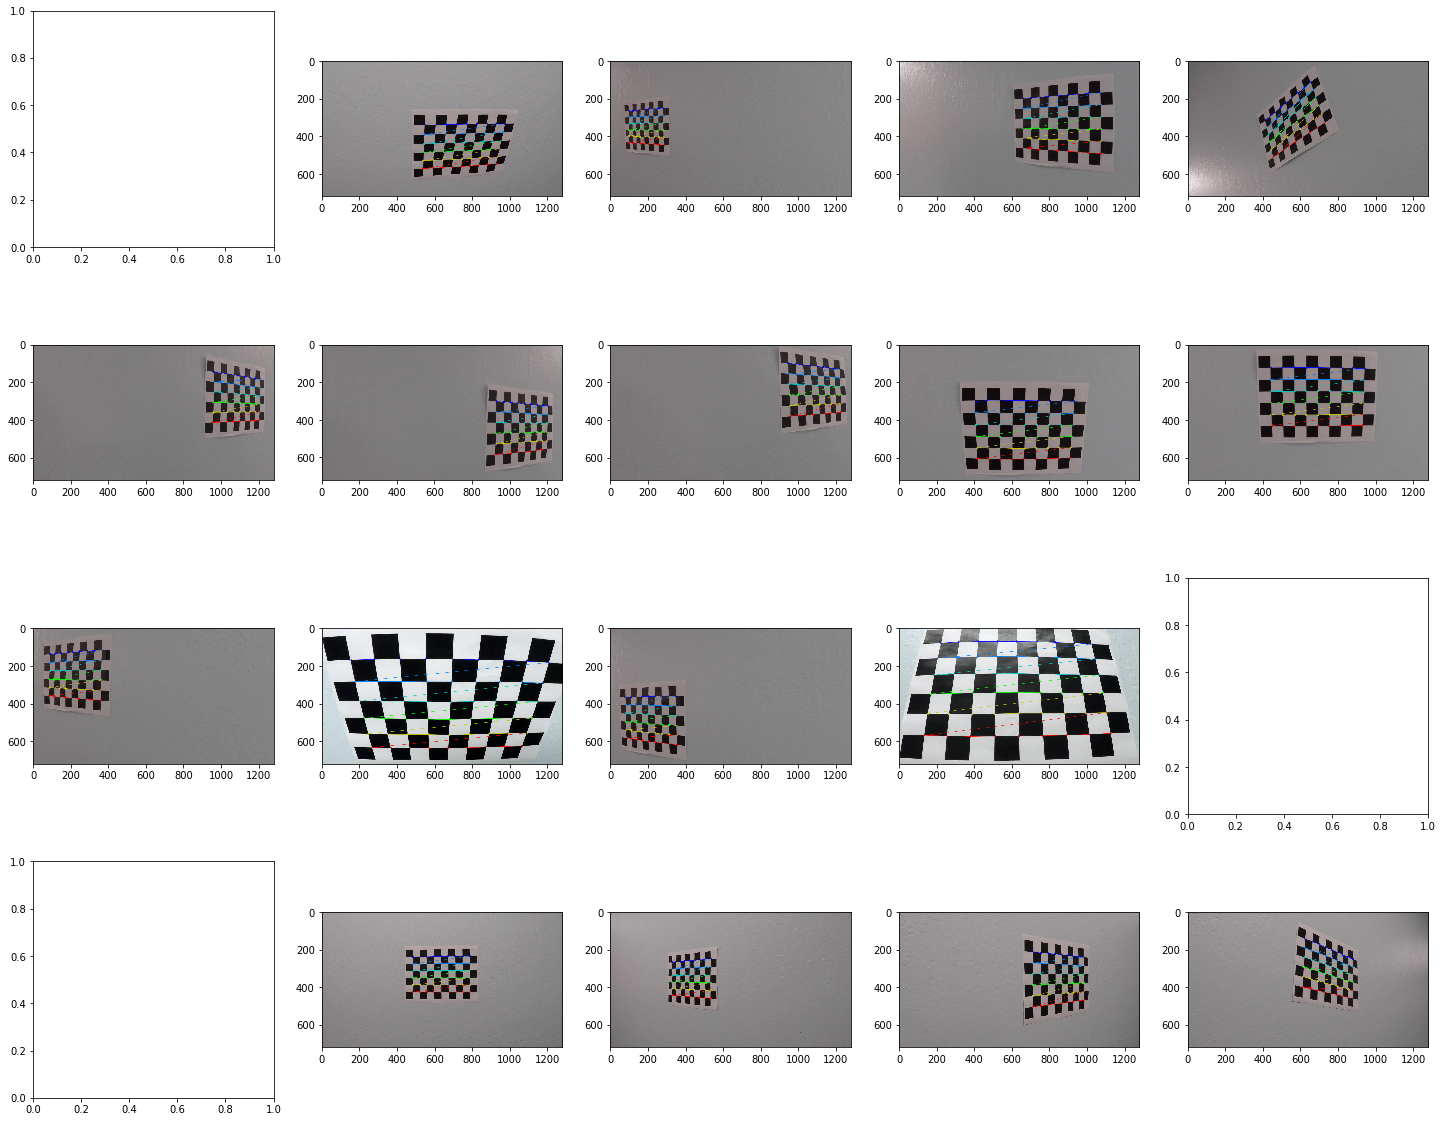

In [24]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/*.jpg')

# display the corners
f, axs = plt.subplots(4,5, figsize=(25, 20))
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].imshow(img)


#### Visualize the distortion correction on chessboard images and road image

Text(0.5,1,'Undistorted Image')

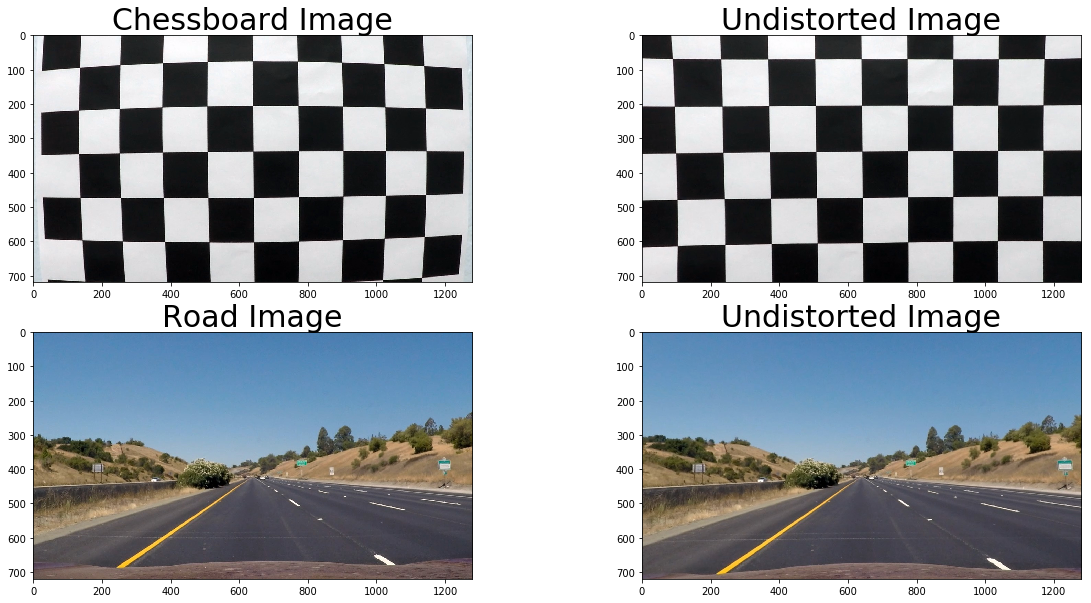

In [34]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/dist_pickle.p", "wb" ) )


dst = cv2.undistort(img, mtx, dist, None, mtx)
road_image = cv2.imread('test_images/straight_lines1.jpg')
road_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)
road_undistort = cv2.undistort(road_image, mtx, dist, None, mtx)


# Visualize undistortion
f, axs = plt.subplots(2, 2, figsize=(20,10))
axs = axs.ravel()
axs[0].imshow(img)
axs[0].set_title('Chessboard Image', fontsize=30)
axs[1].imshow(dst)
axs[1].set_title('Undistorted Image', fontsize=30)
axs[2].imshow(road_image)
axs[2].set_title('Road Image', fontsize=30)
axs[3].imshow(road_undistort)
axs[3].set_title('Undistorted Image', fontsize=30)
